# Part 1


## Hierarchy

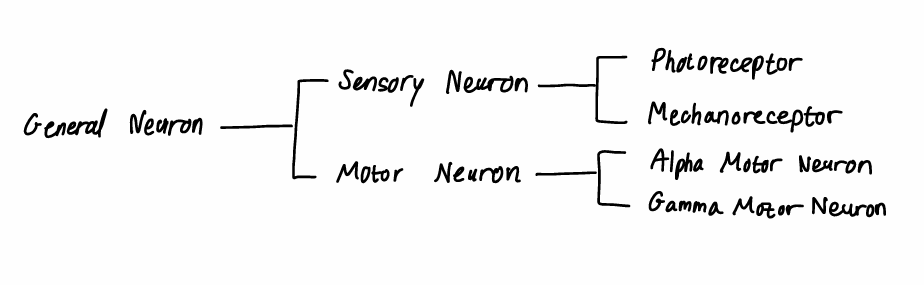

In [11]:
from IPython.display import Image
Image(filename = 'neuron hierarchy.png') 


## Class definitions

In [ ]:
# creating base class
class GeneralNeuron:
    def __init__(self, firing_rate):
         self.firing_rate = firing_rate # firing rate of neuron
    

    def activate(self, stimulus):
         '''
         calculates firing rate based on strength of stimuli
         '''
         pass
    print(f"Neuron is activated in firing rate {self.firing_rate}")


 #creating intermediate classes   
class SensoryNeuron:
    def __init__(self, firing_rate, receptor_type):
        super().__init__(firing_rate) # inheritance from class GeneralNeuron
        self.receptor_type = receptor_type # the type of stimulus the neuron detects

    def sense_stimulus(self, stimulus):
        '''
        processes specific stimulus (which is sensitive to) and activates neuron based on its strength/type
        '''
        pass


class MotorNeuron:
    def __init__(self, firing_rate, target_muscle):
        super().__init__(firing_rate) # inheritance from class GeneralNeuron
        self.target_muscle = target_muscle # specifies muscle controlled bt motor neuron

    def control_muscle(self, activation_level):
        '''
        triggers response in target muscle based on neuron's activation level
        '''
        pass


#creating leaf classes
class Photoreceptor:
    def __init__(self, firing_rate):
        super().__init__(firing_rate, receptor_type = "Light") # inheritance from class SensoryNeuron and override receptor type

    def light_detection(self, light_intensity):
        '''
        receives light intensity as input and activates according to light levels
        '''
        pass


class Mechanoreceptor:
    def __init__(self, firing_rate):
        super().__init__(firing_rate, receptor_type = "Pressure") # inheritance from class SensoryNeuron and override receptor type

    def pressure_detection(self, pressure_level):
        '''
        receives pressure as input and activates in response to the strength of the applied pressure
        '''
        pass


class AlphaMotorNeuron:
    def __init__(self, firing_rate):
        super().__init__(firing_rate, target_muscle = "Muscle Spindle") # inheritance from class MotorNeuron and override activation level

    def skeletal_muscle_control(self, activation_level):
        '''
        initiates muscle contraction or movement in response to its activation level
        '''
        pass


class GammaMotorNeuron:
    def __init__(self, firing_rate):
        super().__init__(firing_rate, target_muscle = "Muscle Spindle") # inheritance from class MotorNeuron and override activation level

    def muscle_spindle_control(self, activation_level):
        '''
        adjusts muscle spindle tension in response to activation, affecting muscle tone
        '''
        pass

# Part 2

### Q1

Original Signal Length: 100
Downsampled Signal Length: 20

Compression Ratio: 0.2


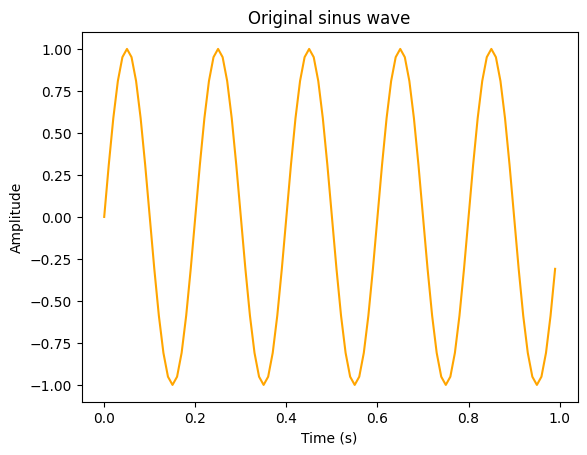

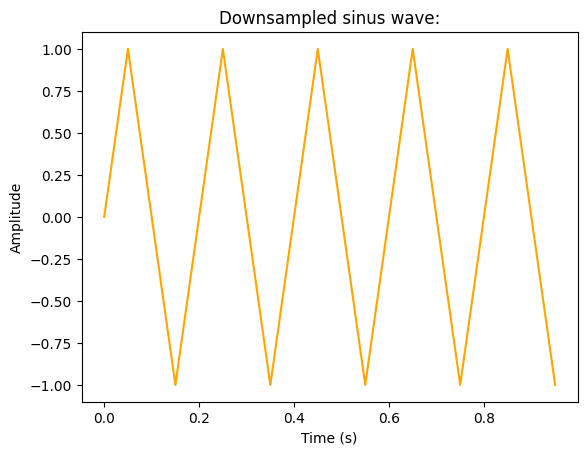

In [77]:
# importing libraries for use in code
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks



# creating function do downsample any given sinusoidal signal
def downsample_signal(signal, time, sampling_rate):
    """
    downsample a sinusoidal signal while preserving maxima and minima points.

    signal: numpy array representing the full sinusoidal signal.
    time: array time of original wave
    sampling_rate: int, step size for downsampling.

    returns:
    downsampled_signal: numpy array of the downsampled signal.
    
    """
    # insuring signal is numpy array
    signal = np.array(signal)

    # finding maxima and minima
    max_indices = find_peaks(signal)[0]
    min_indices = find_peaks(-signal)[0]
    key_indices = np.sort(np.concatenate((max_indices, min_indices))) # combining max and min into one sorted array ensures
                                                                        # downsampled signal same characteristics as original

    # downsampling every chosen data point 
    downsampled_indices = np.arange(0, len(signal), sampling_rate)

    # combining key points with downsampled points, while ensuring no double indicies
    all_indices = np.unique(np.concatenate((key_indices, downsampled_indices)))
    all_indices.sort()

    # extracting the downsampled signal
    downsampled_signal = signal[all_indices]
    downsampled_time = time_array[all_indices]

    return downsampled_signal, downsampled_time


# verifying functionality of code by generating a sinusoidal signal
time_array = np.arange(0, 1, 0.01)  # time array from 0 to 1 second, step 0.01 s
frequency = 5  # frequency of 5 Hz
original_signal = np.sin(2 * np.pi * frequency * time_array) # creating sinus wave

# downsampling the signal
sampling_rate = 5  # use every 5th point - downsampling to 20% 
downsampled_signal, downsampled_time = downsample_signal(original_signal, time_array, sampling_rate)


# presenting results
print("Original Signal Length:", len(original_signal))
print("Downsampled Signal Length:", len(downsampled_signal))


# showing ratio between original to downsampled signal
compression_ratio = len(downsampled_signal) / len(original_signal) 
print("\nCompression Ratio:", compression_ratio)


# plotting original sinus wave
plt.figure()
plt.plot(time_array, original_signal, color = 'orange')
plt.title("Original sinus wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()
print("\n")


# plotting dowsampled sinus wave
plt.figure()
plt.plot(downsampled_time, downsampled_signal, color = 'orange')
plt.title("Downsampled sinus wave:")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()





### Q2

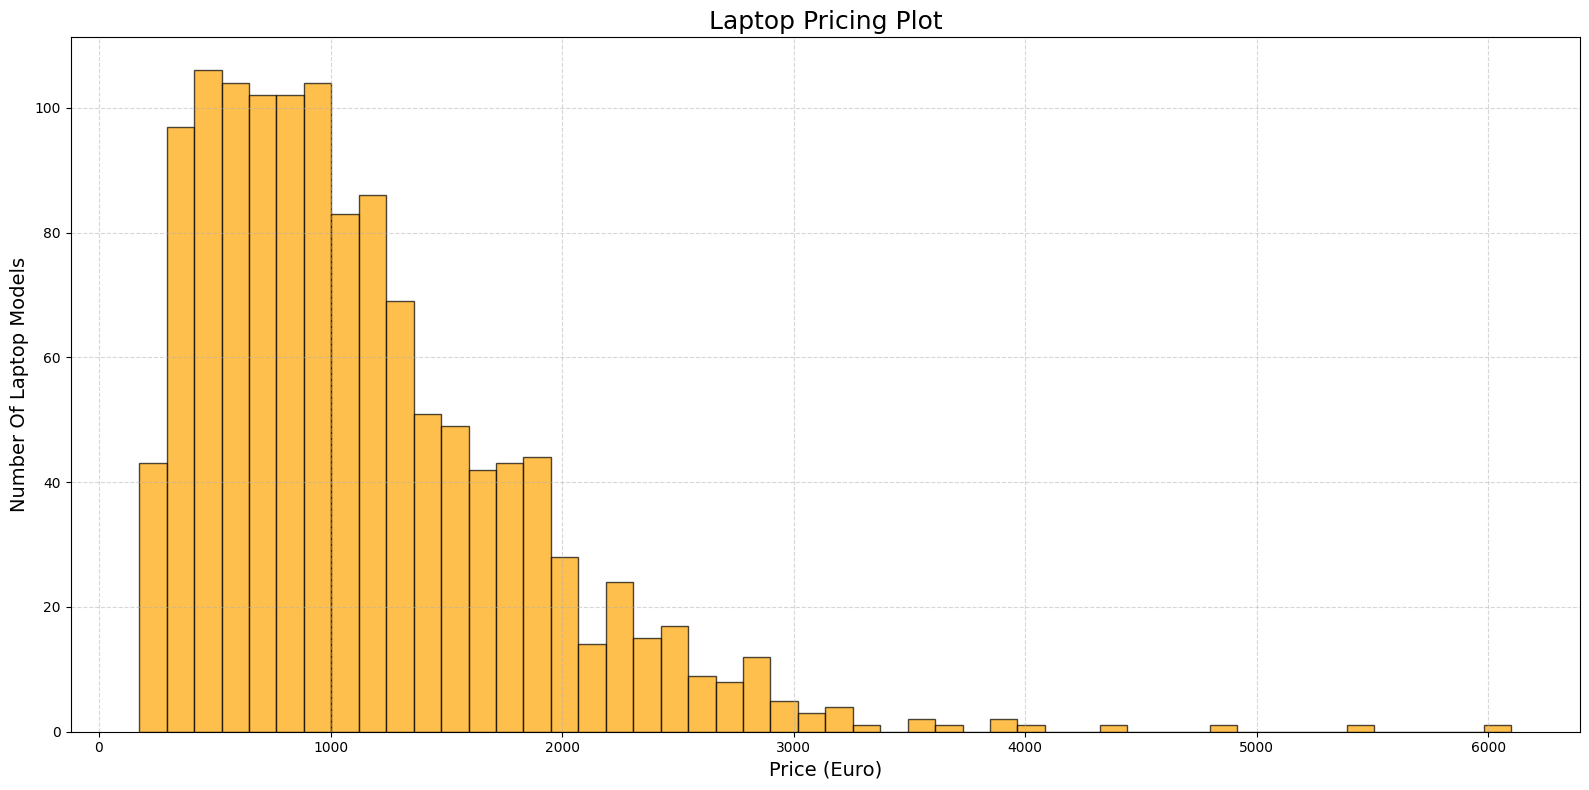

Average laptop prices for each company:

Acer      633.46
Apple     1564.20
Asus      1123.83
Chuwi     314.30
Dell      1199.23
Fujitsu   729.00
Google    1677.67
HP        1080.31
Huawei    1424.00
LG        2099.00
Lenovo    1093.86
MSI       1728.91
Mediacom  295.00
Microsoft 1612.31
Razer     3346.14
Samsung   1413.44
Toshiba   1267.81
Vero      217.43
Xiaomi    1133.46

----The company with the most expensive laptop in average is Razer----

 All opsys before uniformation: 
 ['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']

 All opsys after uniformation: 
 ['macOS' 'Windows 10' 'Linux' 'Android' 'Chrome OS' 'Windows 7']



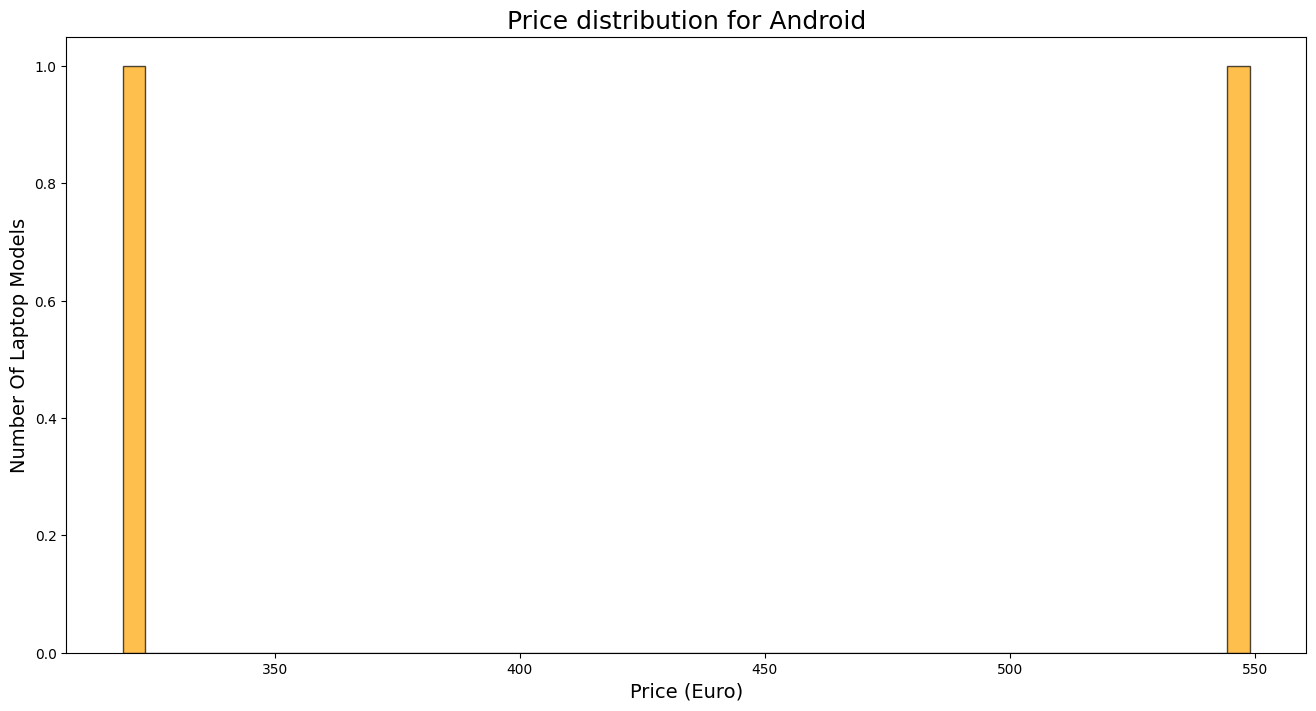

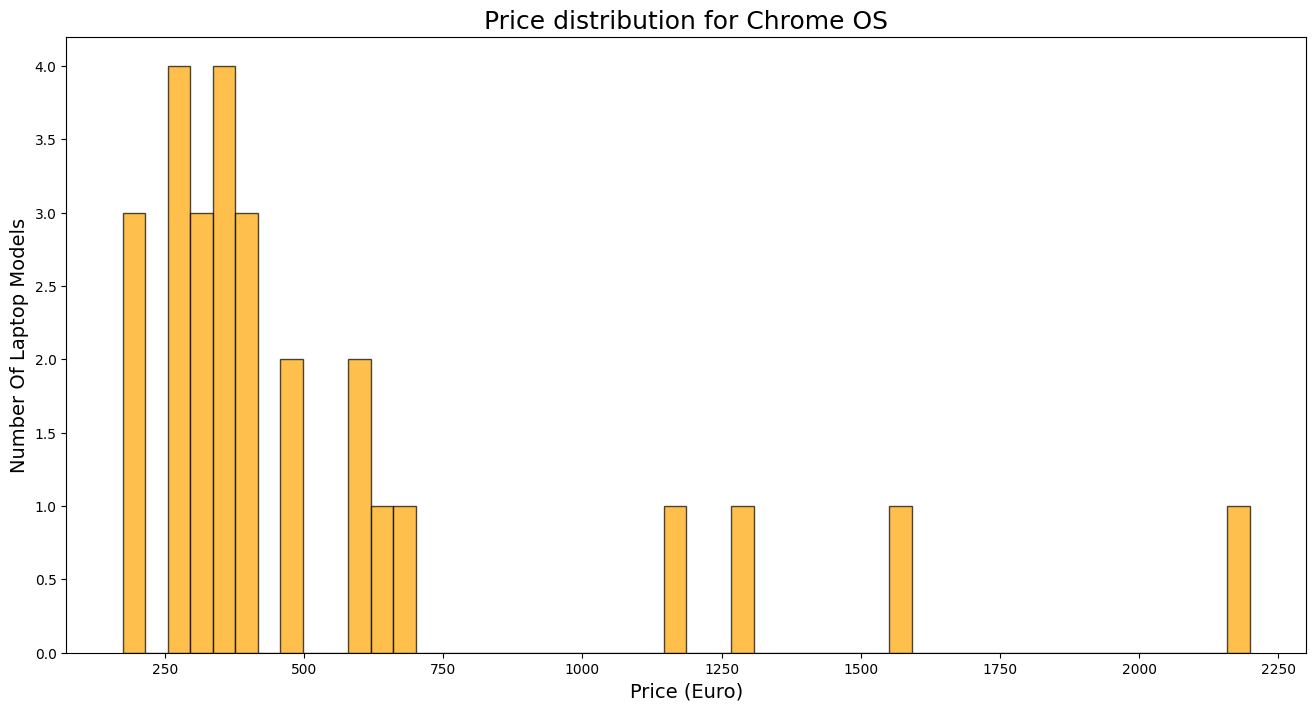

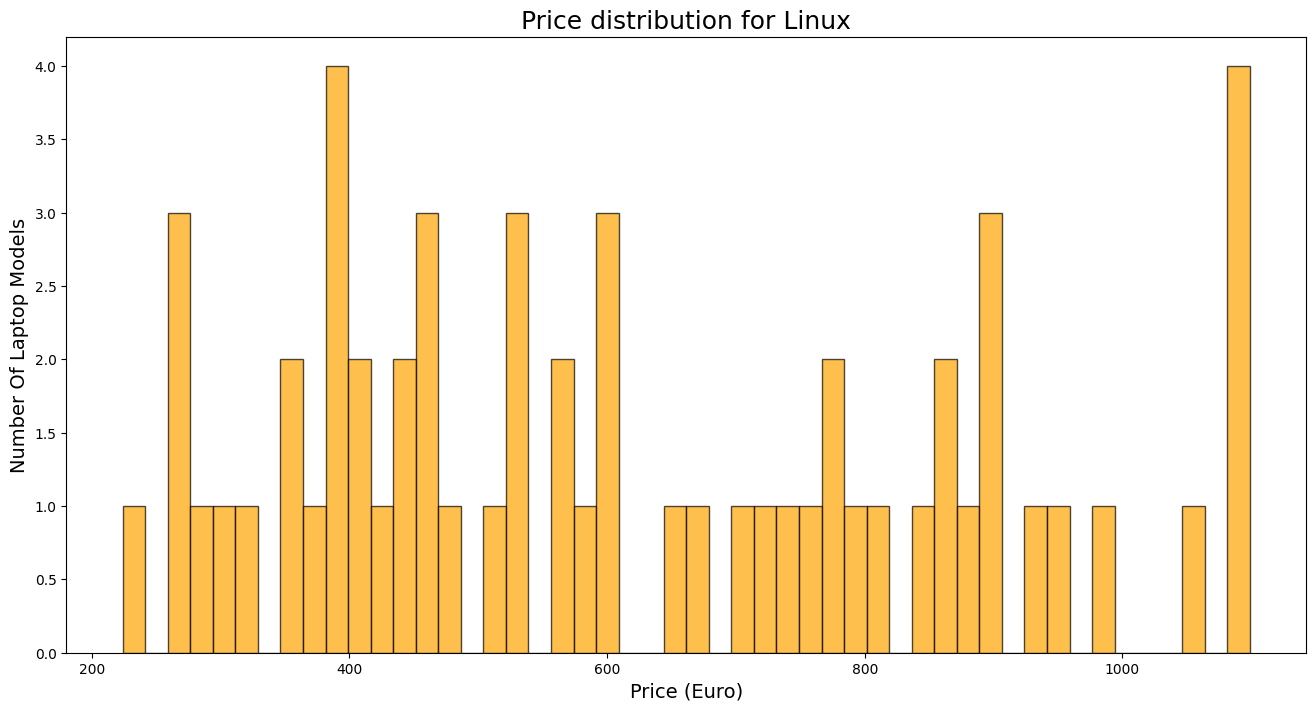

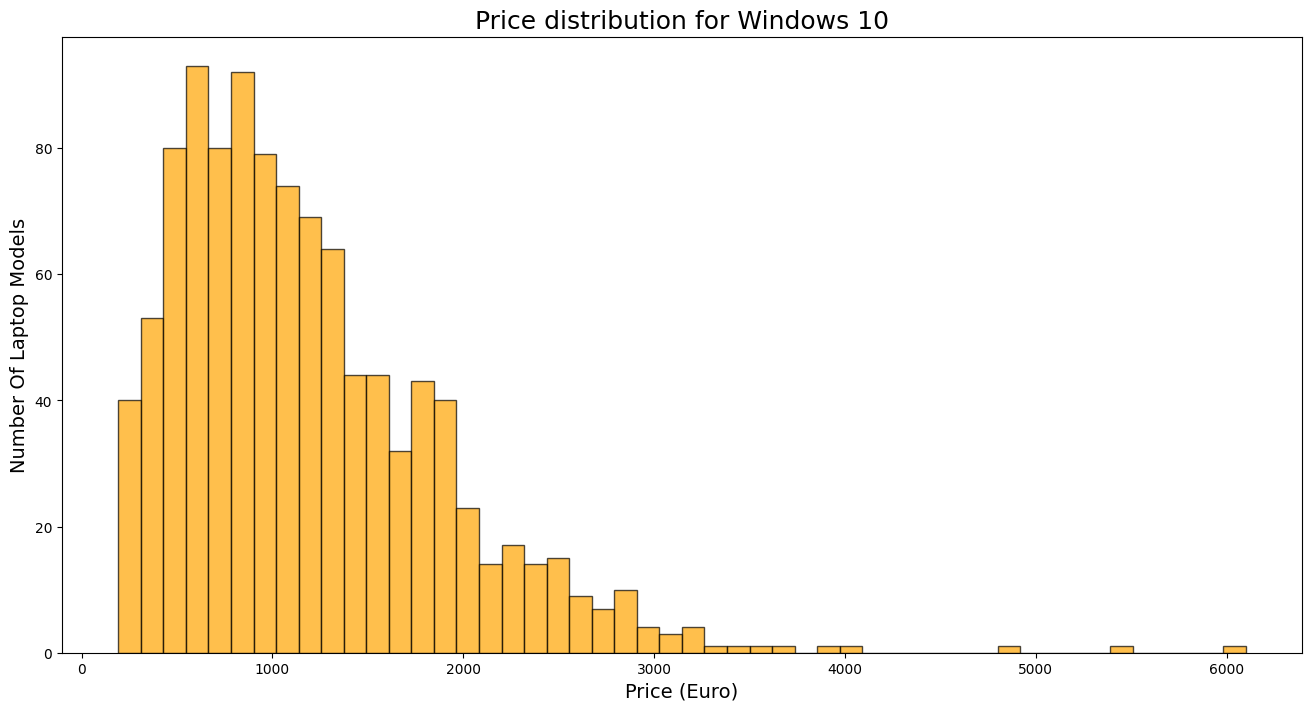

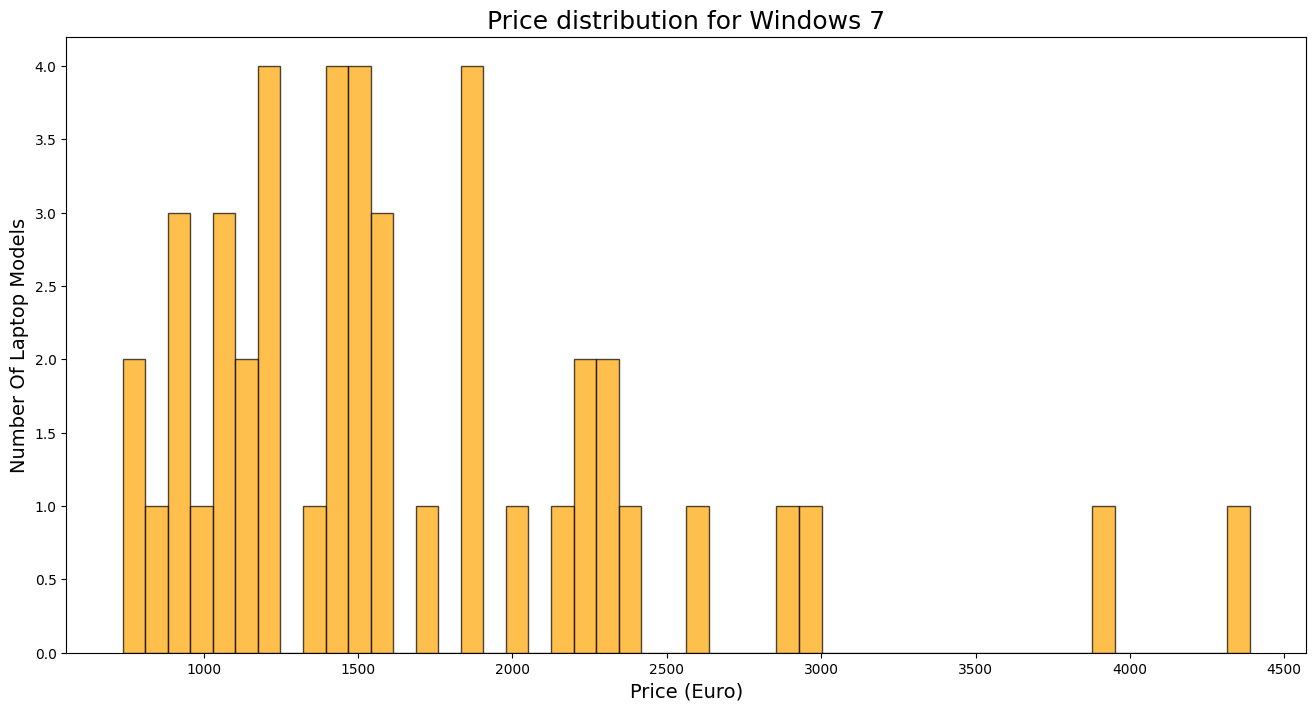

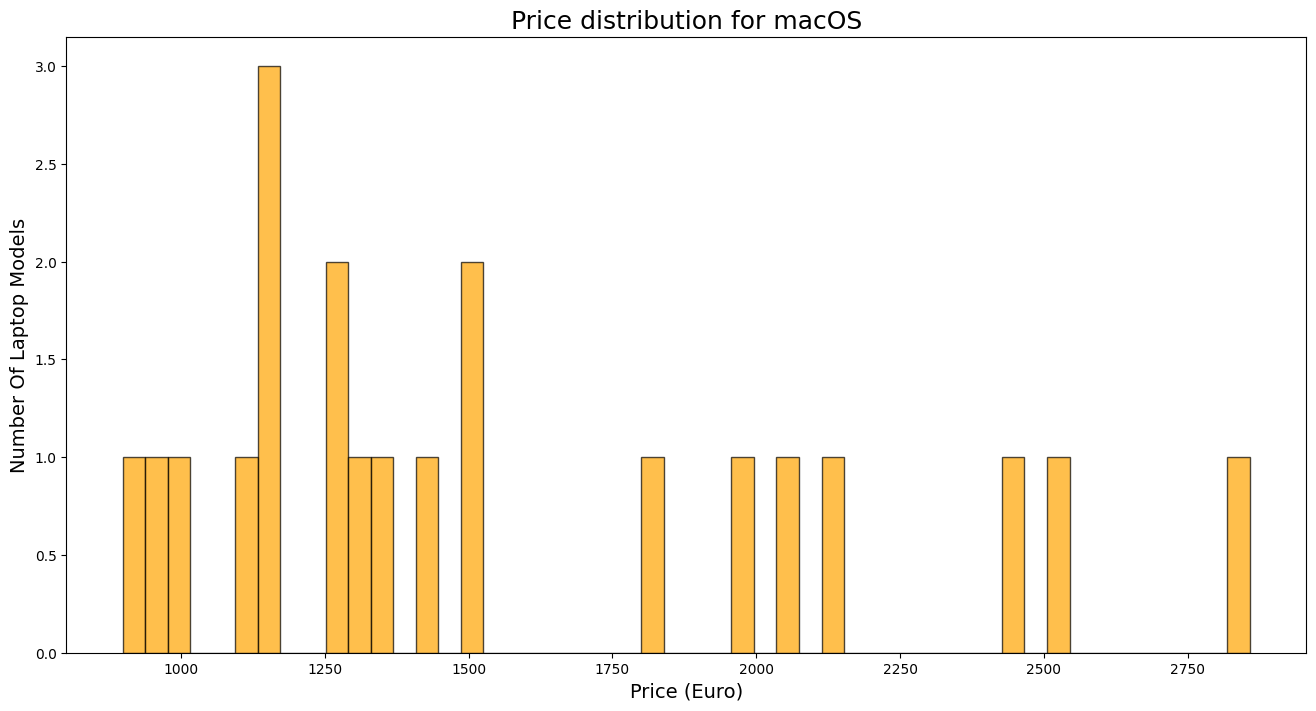

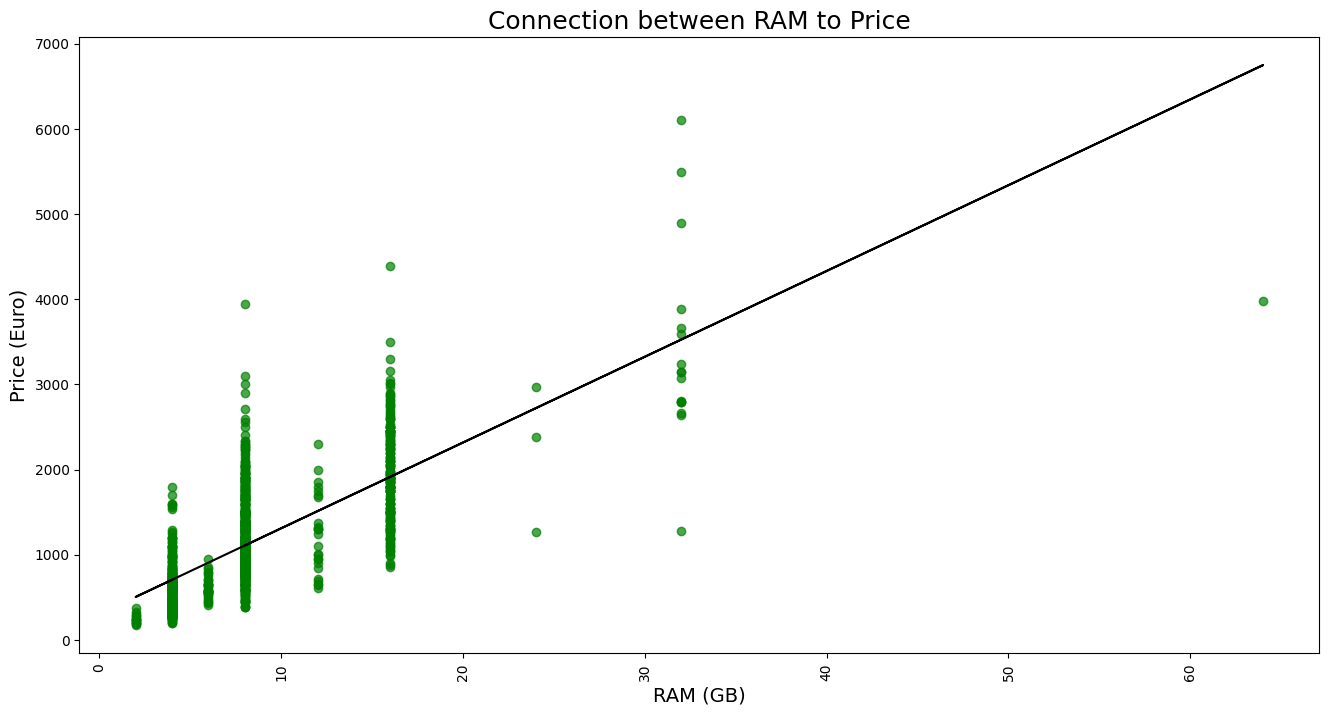


Correlation between RAM to Price: 0.7388455309024824
Mild-strong correlation between both variables. In general, as RAM is higher - price is higher.

     Storage type
0             SSD
1   Flash storage
3             SSD
4             SSD
5             HDD
6   Flash storage
7   Flash storage
8             SSD
9             SSD
12            SSD
13            SSD
14            SSD
15            SSD
16            SSD
17            SSD
19            SSD
20  Flash storage
21      SSD + HDD
23            SSD
24            SSD
25            HDD
26  Flash storage
27            SSD
28      SSD + SSD
29            HDD
30  Flash storage
31  Flash storage
32            HDD
33            SSD
34  Flash storage
35  Flash storage
36            HDD
37      SSD + HDD
38            HDD
39            SSD
40            HDD
41      SSD + HDD
42            HDD
43            SSD
44            HDD


In [79]:
# importing libraries for use in code
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# pandas reading data file
data = pd.read_csv("laptop_price - dataset.csv")


# creating plot graph 
plt.figure(figsize = (16, 8)) # widening graph
plt.hist(data['Price (Euro)'], bins = 50, edgecolor = 'black', color = 'orange', alpha = 0.7) 
plt.title('Laptop Pricing Plot', fontsize = 18) # adding title and lables
plt.ylabel('Number Of Laptop Models', fontsize = 14)
plt.xlabel('Price (Euro)', fontsize = 14)

# defining grid to make display clear
plt.grid(linestyle = '--', alpha = 0.5)

# modeling layout to make sure no overlaps 
plt.tight_layout()
plt.show()


########


# calculating average prices for each company from data
average_prices = data.groupby('Company')['Price (Euro)'].mean()

# defining DataFrame with data collected before by groupby
average_prices_df = average_prices.reset_index()
print('Average laptop prices for each company:\n')

# using f-string and spacing to adjust columns to left, and access to company and average price by the new df
for index, row in average_prices_df.iterrows():
    print(f'{row["Company"]:<10}{row["Price (Euro)"]:.2f}')


# finding most expensive laptop from index and printing.
most_expensive_company = average_prices_df.loc[average_prices_df['Price (Euro)'].idxmax()]
print(f"\n----The company with the most expensive laptop in average is {most_expensive_company['Company']}----")


#########


# printing all opsys to see which are the same and need to be uniformed
print(f"\n All opsys before uniformation: \n", data['OpSys'].unique()) 

# standerizing
data['OpSys'] = data['OpSys'].str.strip()
data = data[data['OpSys'] != 'No OS'] # taking out "no OS" from new dataframe
data['OpSys'] = data['OpSys'].replace({'Mac OS X': 'macOS', 'Windows 10 S': 'Windows 10'})


# printing all opsys after uniformation
print(f"\n All opsys after uniformation: \n {data['OpSys'].unique()}\n")


#########


grouped_opsys = data.groupby('OpSys')
for opsys, group in grouped_opsys: 
    plt.figure(figsize = (16, 8))  # widening graph
    plt.hist(group['Price (Euro)'], bins = 50, edgecolor = 'black', color = 'orange', alpha = 0.7) 
    plt.title(f'Price distribution for {opsys}', fontsize = 18)  # adding title and labels
    plt.ylabel('Number Of Laptop Models', fontsize = 14)
    plt.xlabel('Price (Euro)', fontsize = 14)
    plt.xticks()
    plt.show()

    print('\n\n')


#########


plt.figure(figsize = (16, 8))
plt.scatter(data['RAM (GB)'], data['Price (Euro)'], color = 'green', alpha = 0.7)
plt.title('Connection between RAM to Price', fontsize = 18)
plt.xlabel('RAM (GB)', fontsize = 14)
plt.ylabel('Price (Euro)', fontsize = 14)
plt.xticks(rotation = 90)

# adding regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(data['RAM (GB)'], data['Price (Euro)'])
line = slope * data['RAM (GB)'] + intercept
plt.plot(data['RAM (GB)'], line, color = 'black', label = 'Regression Line')
plt.show()

# checking if there is correlation between RAM to Price
correlation = data['RAM (GB)'].corr(data['Price (Euro)'])
print(f"\nCorrelation between RAM to Price: {correlation}")
print('Mild-strong correlation between both variables. In general, as RAM is higher - price is higher.\n')


#########


# creating function to extract storage types from memory column
def extract_storage_type(memory_value):
    
    '''
    extracts opsys from "Memory" column and adds it to new column of "Storage Type" 
    
    memory_value: from memory column
    
    returns:
    opsys to the new column, matched to spesific product
    '''
    storage_types = []
    words = memory_value.split()
    for word in words: # extracting only storage types
        if word in ['SSD', 'HDD', 'Flash']:
            if word == 'Flash':
               storage_types.append('Flash storage') # adding to list
            else:
                storage_types.append(word) # adding to list
    if storage_types:
        return ' + '.join(storage_types) # if there is more than one storage type
    else:
        return ''
    
data['Storage type'] = data['Memory'].apply(extract_storage_type) # using function when adding new column to data
print(data[['Storage type']].head(40)) # showing it works











# Bonus

### Additional questions:

1. What is the average weight for a laptop for each company? visualize
2. Does weight correlate with inches? visualize


### Implementation:

Question 1:

Average laptop weight for each company:

Acer       2.16      
Apple      1.32      
Asus       2.23      
Chuwi      1.73      
Dell       2.14      
Fujitsu    2.23      
Google     1.10      
HP         1.91      
Huawei     1.05      
LG         1.05      
Lenovo     2.01      
MSI        2.66      
Mediacom   1.34      
Microsoft  1.25      
Razer      2.20      
Samsung    1.32      
Toshiba    1.64      
Vero       1.33      
Xiaomi     1.62      


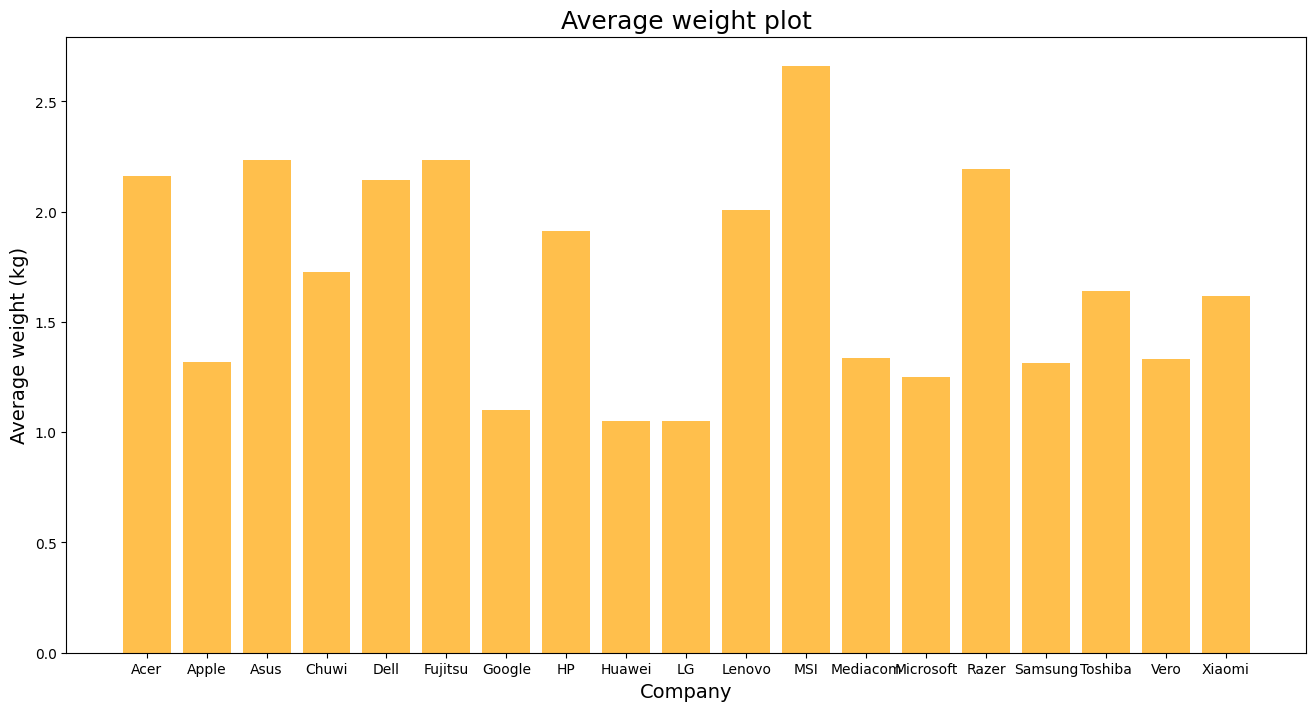


Question 2:


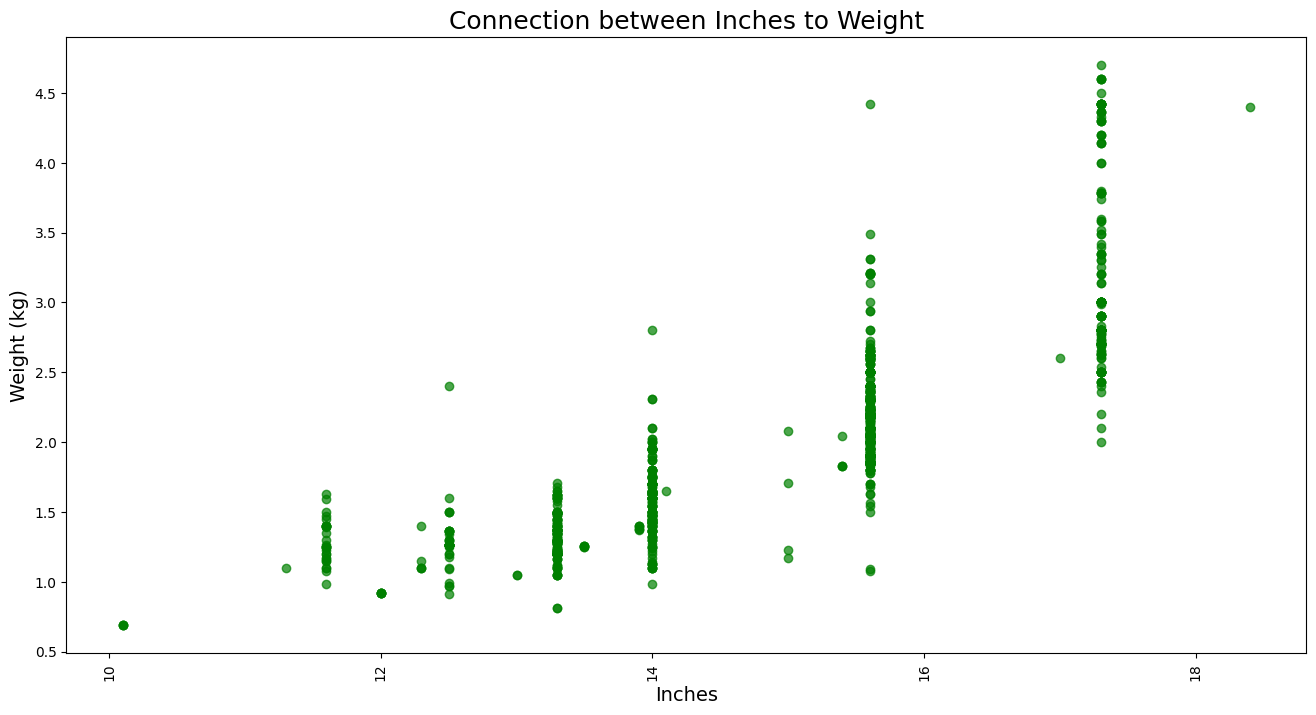


Correlation between Inches to Weight: 0.8266379625499077


In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



# q1:
# pandas reading data file
data = pd.read_csv("laptop_price - dataset.csv")


print('Question 1:\n')
# calculating average weight for each company from data
average_weights = data.groupby('Company')['Weight (kg)'].mean()

# defining DataFrame with data collected before by groupby
average_weights_df = average_weights.reset_index()
print('Average laptop weight for each company:\n')

# using f-string and spacing to adjust colunms to left  
# print(f"{'Company': <20} {'Weight (kg)': <10}")
# print("-" * 30)
for index, row in average_weights_df.iterrows(): # printing them in rows withe specific space between them
    print(f"{row['Company'] :<10} {row['Weight (kg)']: <10.2f}") # rounding to 2 numbers after point

# visualization
plt.figure(figsize = (16, 8)) # widening graph
plt.bar(average_weights_df['Company'], average_weights_df['Weight (kg)'], color = 'orange', alpha = 0.7) 
plt.title(f'Average weight plot', fontsize = 18) # adding title and lables   
plt.xlabel('Company', fontsize = 14)
plt.ylabel('Average weight (kg)', fontsize = 14)
plt.show()


#########


# q2:
# visualization:
print('\nQuestion 2:')
plt.figure(figsize = (16, 8))
plt.scatter(data['Inches'], data['Weight (kg)'], color = 'green', alpha = 0.7)
plt.title('Connection between Inches to Weight', fontsize = 18)
plt.xlabel('Inches', fontsize = 14)
plt.ylabel('Weight (kg)', fontsize = 14)
plt.xticks(rotation = 90)
plt.show()

correlation = data['Inches'].corr(data['Weight (kg)'])
print(f"\nCorrelation between Inches to Weight: {correlation}")


